In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import GridSearchCV #or randomized searched CV

In [10]:
df= pd.read_csv('../../Data/Transformed/inventory_management_cleaned_transformed_unscaled_jaron.csv')
df.head()

,Category,Region,Inventory Level,Price,Discount,Weather Condition,Promotion,Competitor Pricing,Product_UID,Weekday
0,1,1,195,72.72,5,1,0,85.73,S001_P0001,2
1,0,1,117,80.16,15,1,1,92.02,S001_P0002,2
2,0,1,247,62.94,10,1,1,60.08,S001_P0003,2
3,1,1,139,87.63,10,1,0,85.19,S001_P0004,2
4,3,1,152,54.41,0,1,0,51.63,S001_P0005,2


In [18]:
y = df.loc[:, "Promotion"]
X = df.loc[:, ~df.columns.isin(['Promotion', 'Product_UID'])]

In [19]:
y

0       0
1       1
2       1
3       0
4       0
       ..
1717    0
1718    1
1719    0
1720    0
1721    1
Name: Promotion, Length: 1722, dtype: int64

In [20]:
X

,Category,Region,Inventory Level,Price,Discount,Weather Condition,Competitor Pricing,Weekday
0,1,1,195,72.72,5,1,85.73,2
1,0,1,117,80.16,15,1,92.02,2
2,0,1,247,62.94,10,1,60.08,2
3,1,1,139,87.63,10,1,85.19,2
4,3,1,152,54.41,0,1,51.63,2
...,...,...,...,...,...,...,...,...
1717,3,1,129,62.83,10,0,74.57,5
1718,2,1,104,98.97,10,0,88.85,5
1719,2,1,494,111.25,10,0,102.91,5
1720,3,2,625,69.62,5,1,76.96,5


In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [22]:
X_train.shape, X_test.shape

((1153, 8), (569, 8))

In [23]:
dt_gini = DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=3, min_samples_split=2,min_samples_leaf=1, random_state=0)
dt_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [24]:
y_pred_gini = dt_gini.predict(X_test)

In [ ]:
accuracy_score (y_test, y_pred_gini)
#Good score

0.8927943760984183

In [26]:
y_pred_train_gini = dt_gini.predict(X_train)
y_pred_train_gini

array([1, 0, 0, ..., 0, 1, 0], dtype=int64)

In [ ]:
dt_gini.score(X_train, y_train)
#Good score

0.9098005203816132

[Text(0.6, 0.875, 'Discount <= 12.5\ngini = 0.458\nsamples = 1153\nvalue = [743, 410]\nclass = No Promotion'),
 Text(0.4, 0.625, 'Discount <= 7.5\ngini = 0.225\nsamples = 853\nvalue = [743, 110]\nclass = No Promotion'),
 Text(0.2, 0.375, 'gini = 0.0\nsamples = 476\nvalue = [476, 0]\nclass = No Promotion'),
 Text(0.6, 0.375, 'Price <= 159.95\ngini = 0.413\nsamples = 377\nvalue = [267, 110]\nclass = No Promotion'),
 Text(0.4, 0.125, 'gini = 0.402\nsamples = 369\nvalue = [266, 103]\nclass = No Promotion'),
 Text(0.8, 0.125, 'gini = 0.219\nsamples = 8\nvalue = [1, 7]\nclass = Promotion'),
 Text(0.8, 0.625, 'gini = 0.0\nsamples = 300\nvalue = [0, 300]\nclass = Promotion')]

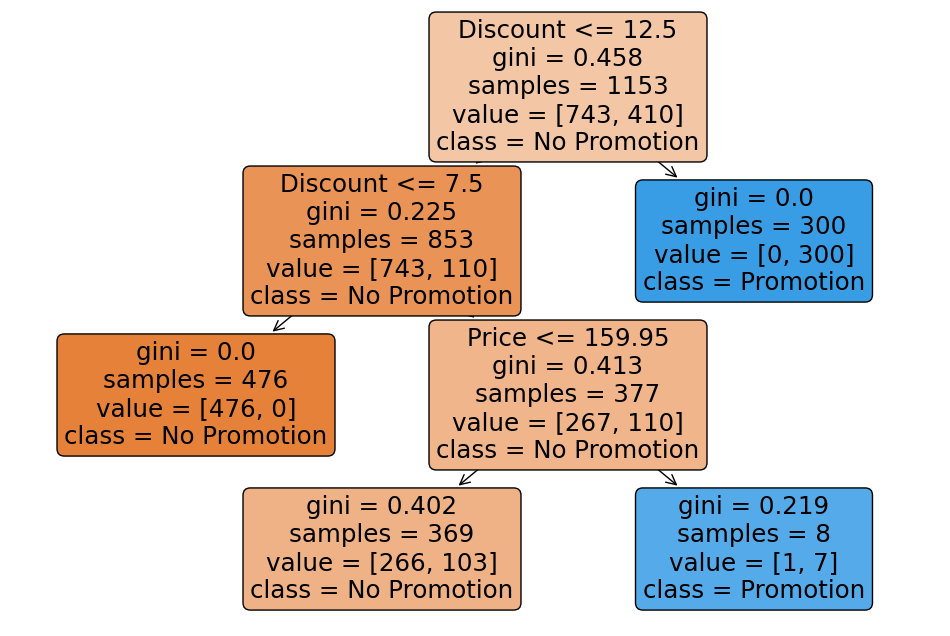

In [28]:
plt.figure(figsize=(12, 8))

tree.plot_tree(
    dt_gini,
    feature_names=X.columns,
    class_names=['No Promotion', 'Promotion'],
    filled=True,
    rounded=True
)

Text(0.5, 1.0, 'Confusion Matrix')

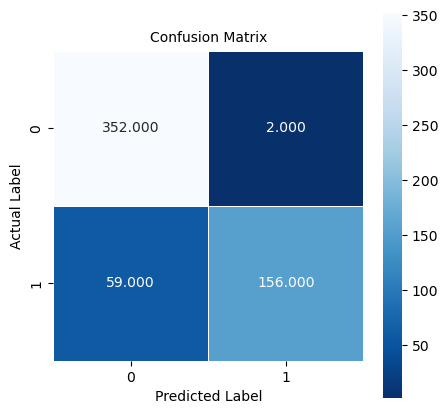

In [29]:
# We see that there is still optimization potential 
confusion_matrix = metrics.confusion_matrix(y_test, y_pred_gini)
plt.figure(figsize=(5,5))
sns.heatmap(confusion_matrix, annot=True, fmt=".3f", linewidths=.5, square=True, cmap="Blues_r")
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix', size = 10)

In [30]:
print(classification_report(y_test, y_pred_gini))

              precision    recall  f1-score   support

           0       0.86      0.99      0.92       354
           1       0.99      0.73      0.84       215

    accuracy                           0.89       569
   macro avg       0.92      0.86      0.88       569
weighted avg       0.91      0.89      0.89       569



In [31]:
# Use cross validation to get a robust model
kf = KFold(n_splits=10, shuffle=True, random_state=42)

In [32]:
# We see that we have a robust model because our score is independant of the data combinations
# Our accuracy would be the mean of this score
score = cross_val_score(tree.DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=3, min_samples_split=2,min_samples_leaf=1, random_state=0), X, y, cv=kf, scoring="accuracy")
score

array([0.90751445, 0.88439306, 0.90697674, 0.88372093, 0.90116279,
       0.90697674, 0.93023256, 0.88953488, 0.86627907, 0.9244186 ])

In [33]:
# We start with a tree with no specified parameters
dt_noparam = DecisionTreeClassifier(criterion='gini', splitter='best', random_state=42)
dt_noparam.fit(X_train, y_train)
y_pred = dt_noparam.predict(X_test)
accuracy_score(y_test, y_pred)

0.8453427065026362

[Text(0.7459014592123769, 0.975, 'Discount <= 12.5\ngini = 0.458\nsamples = 1153\nvalue = [743, 410]\nclass = No Promotion'),
 Text(0.7346497011251758, 0.925, 'Discount <= 7.5\ngini = 0.225\nsamples = 853\nvalue = [743, 110]\nclass = No Promotion'),
 Text(0.7233979430379747, 0.875, 'gini = 0.0\nsamples = 476\nvalue = [476, 0]\nclass = No Promotion'),
 Text(0.7459014592123769, 0.875, 'Price <= 159.95\ngini = 0.413\nsamples = 377\nvalue = [267, 110]\nclass = No Promotion'),
 Text(0.5508746483825597, 0.825, 'Category <= 2.5\ngini = 0.402\nsamples = 369\nvalue = [266, 103]\nclass = No Promotion'),
 Text(0.27566807313642755, 0.775, 'Region <= 1.5\ngini = 0.336\nsamples = 159\nvalue = [125, 34]\nclass = No Promotion'),
 Text(0.16877637130801687, 0.725, 'Price <= 136.245\ngini = 0.412\nsamples = 86\nvalue = [61, 25]\nclass = No Promotion'),
 Text(0.15752461322081576, 0.675, 'Competitor Pricing <= 101.03\ngini = 0.372\nsamples = 81\nvalue = [61, 20]\nclass = No Promotion'),
 Text(0.07313642756

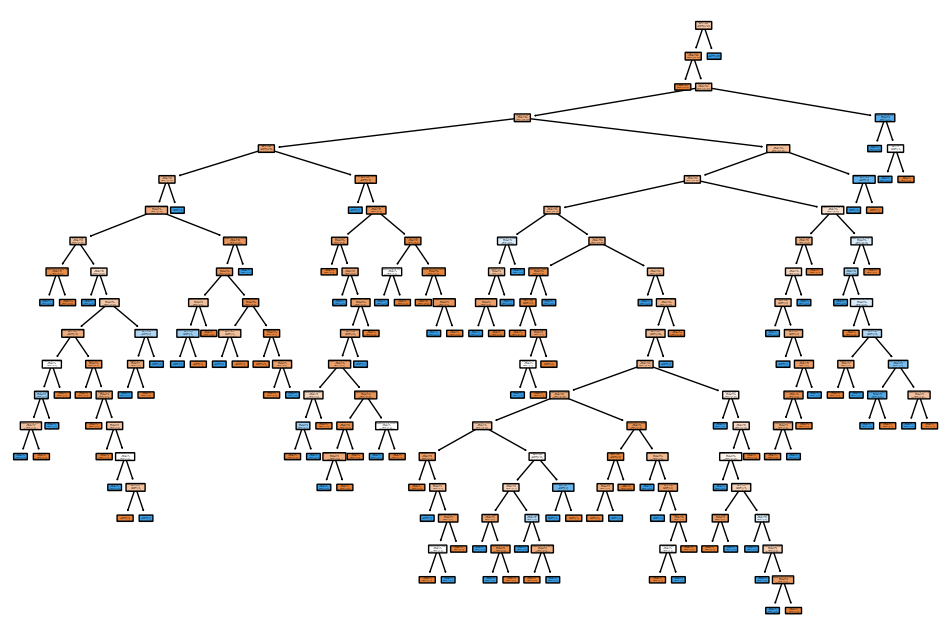

In [34]:
plt.figure(figsize=(12, 8))
tree.plot_tree(
    dt_noparam,
    feature_names=X.columns,
    class_names=['No Promotion', 'Promotion'],
    filled=True,
    rounded=True
)

In [ ]:

text_representation = tree.export_text(dt_gini, feature_names=["Category", "Region", "Inventory Level", "Price","Discount","Weather Condition", "Competitor Pricing", "Weekday"])
print(text_representation)


|--- Discount <= 12.50
|   |--- Discount <= 7.50
|   |   |--- class: 0
|   |--- Discount >  7.50
|   |   |--- Price <= 159.95
|   |   |   |--- class: 0
|   |   |--- Price >  159.95
|   |   |   |--- class: 1
|--- Discount >  12.50
|   |--- class: 1

